In [345]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from ema_workbench import MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim, dimensional_stacking

In [347]:
experiments, outcomes = load_results('./data/results.tar.gz')

[MainProcess/INFO] results loaded successfully from C:\Users\maxva\Downloads\epa141A_open-master\epa141A_open-master\final assignment\data\results.tar.gz


In [349]:
experiments = pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)

In [351]:
outcomes

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,2.889173e+09,0.0,2.043583
1,1.446423e+09,0.0,1.461669
2,2.913219e+08,0.0,0.524921
3,3.582799e+09,0.0,2.018168
4,6.463175e+08,0.0,1.002809
...,...,...,...
995,9.963240e+07,0.0,0.120246
996,3.053333e+09,0.0,2.910806
997,2.046713e+09,0.0,3.762321
998,1.946510e+08,0.0,0.237261


In [353]:
outcomes_focus = outcomes.drop(columns = ['Expected Annual Damage', 'Total Investment Costs'])

In [355]:
outcomes_focus

,Expected Number of Deaths
0,2.043583
1,1.461669
2,0.524921
3,2.018168
4,1.002809
...,...
995,0.120246
996,2.910806
997,3.762321
998,0.237261


In [357]:
results = pd.concat([experiments, outcomes])

In [359]:
uncertainties = experiments.iloc[:, :19]
levers = experiments.iloc[:, 19:50]

In [361]:
X = uncertainties
y = outcomes_focus['Expected Number of Deaths']

In [363]:
y

0      2.043583
1      1.461669
2      0.524921
3      2.018168
4      1.002809
         ...   
995    0.120246
996    2.910806
997    3.762321
998    0.237261
999    2.125344
Name: Expected Number of Deaths, Length: 1000, dtype: float64

In [403]:
a = y.quantile(0.85)
Y = (y > a).astype(int).values

In [379]:
a

3.7795685115961652

In [409]:
ema_logging.log_to_stderr(ema_logging.INFO)

prim_algorithm = prim.Prim(X, Y, threshold = 0.75)
box1 = prim_algorithm.find_box()

[MainProcess/INFO] 1000 points remaining, containing 150 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.114, coverage: 0.76, density: 1.0 restricted_dimensions: 4


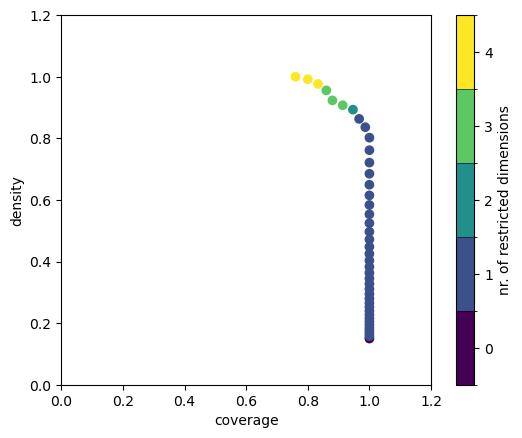

In [411]:
box1.show_tradeoff()
plt.show()

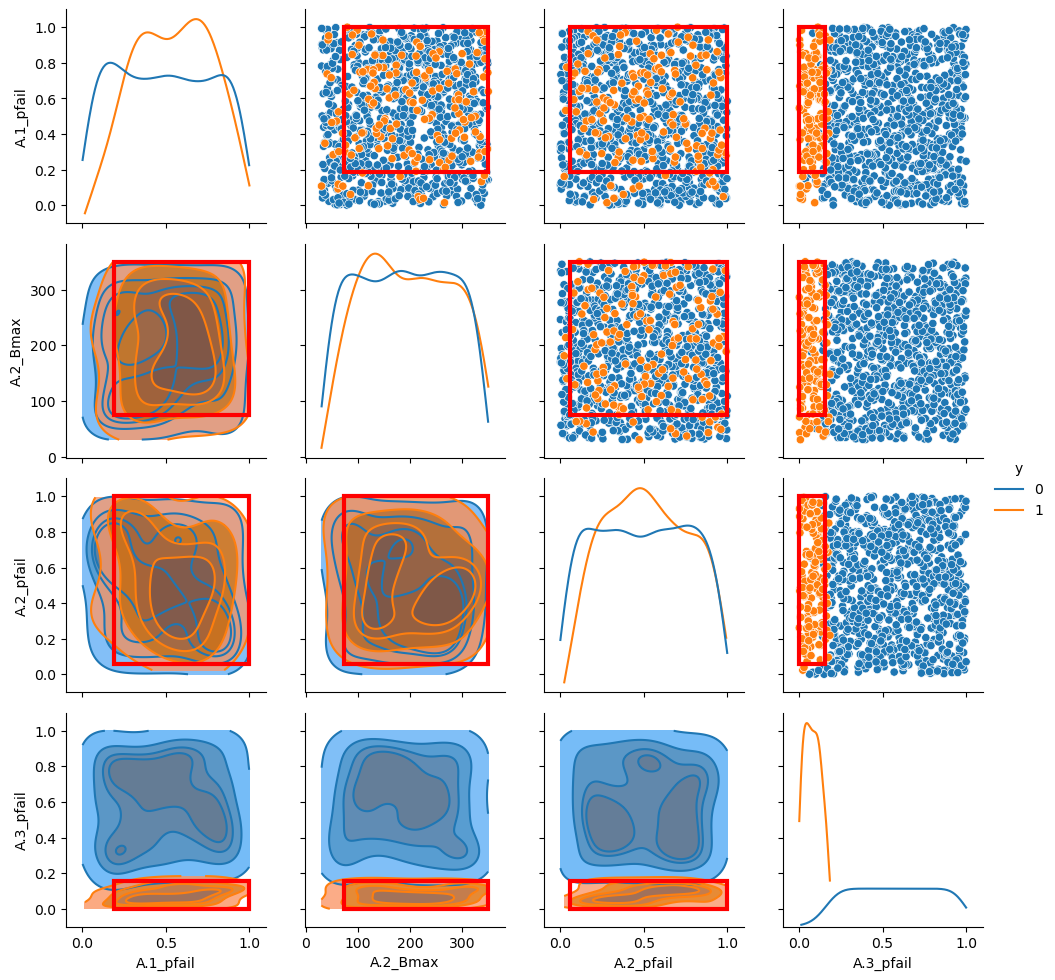

In [413]:
box1.show_pairs_scatter()
plt.show()

In [415]:
scenarios_of_interest = box1.peeling_trajectory
scenarios_of_interest = scenarios_of_interest[(scenarios_of_interest.coverage > 0.7) & (scenarios_of_interest.density > 0.8)]

The main focus of the client is to prevent casualties. Therefore it is important to have a high coverage as you don't want to miss scenario's with a high expected amount of casualties. It is less precise but more certain that all high casualty scenario's are captured in the box. Coverage above 0.9, therefore we loosen density restrictions to 0.5.

In [417]:
scenarios_of_interest = scenarios_of_interest.sort_values(by='coverage', ascending=False)
scenarios_of_interest

,coverage,density,id,k,mass,mean,n,res_dim
32,1.000000,0.802139,32,150,0.187,0.802139,187,1
33,0.986667,0.836158,33,148,0.177,0.836158,177,1
34,0.966667,0.863095,34,145,0.168,0.863095,168,1
35,0.946667,0.893082,35,142,0.159,0.893082,159,2
36,0.913333,0.907285,36,137,0.151,0.907285,151,3
37,0.880000,0.923077,37,132,0.143,0.923077,143,3
38,0.860000,0.955556,38,129,0.135,0.955556,135,3
39,0.833333,0.976562,39,125,0.128,0.976562,128,4
40,0.800000,0.991736,40,120,0.121,0.991736,121,4
41,0.760000,1.000000,41,114,0.114,1.000000,114,4
